In [2]:
from math import exp
%matplotlib inline

import matplotlib
import numpy as np
from numpy import linspace
import matplotlib.pyplot as plt
from math import fabs

In [3]:
alpha = 2

In [4]:
# HELPERS

def f_common(x, alpha, mu, imm):
    return x ** alpha * exp(mu * (1 - x)) + imm

def seq(start, f, count):
    curr = start
    for _ in range(count):
        if curr < 0:
            return
        yield curr
        curr = f(curr)

def seq1(start, f, count):
    return list(seq(start, f, count))

def get_f(mu, imm):
    return lambda x: f_common(x, alpha, mu, imm)

def close(x1, x2):
    return fabs(x1 - x2) < 0.0001

def sep(l):
    return [i[0] for i in l], [i[1] for i in l]

In [53]:
mu = 0.15
imm = 1
f = get_f(mu, imm)
start = 1.5

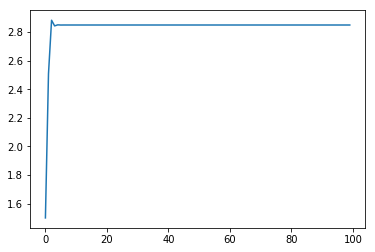

In [6]:
points = seq1(start, f, 100)
plt.plot(points)

In [58]:
def bif_mu(start, end, count):
    f_mu = lambda x, mu: f_common(x, alpha, mu, imm)
    mu_range = linspace(start, end, count)
    for mu_ in mu_range:
        curr_f = lambda x: f_mu(x, mu_)
        start = 1.5
        points = seq(start, curr_f, 10000)
        for x_ in points:
            curr_x = x_
        yield mu_, curr_x

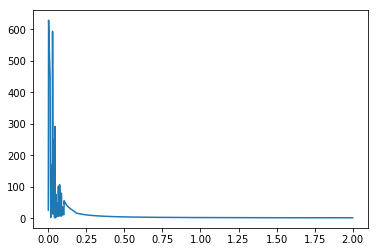

In [59]:
bif = list(bif_mu(0.0001, 2, 1000))
plt.plot(*sep(bif))

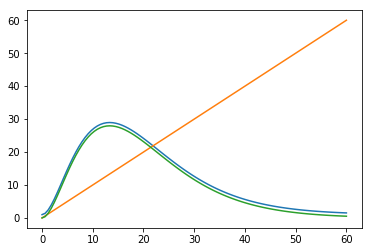

In [55]:
xs = list(linspace(0, 60, 100))
fs = [f(x) for x in xs]
plt.plot(xs, fs)
plt.plot(xs, xs)
plt.plot(xs, [x - 1 for x in fs])

In [50]:
def bif_imm(start, end, count):
    f_imm = lambda x1, imm1: f_common(x1, alpha, mu, imm1)
    imm_range = linspace(start, end, count)
    for imm_ in imm_range:
        curr_f = lambda x_: f_imm(x_, imm_)
        start = 1.5
        for x_ in seq(start, curr_f, 1000):
            curr_x = x_
        yield imm_, curr_x

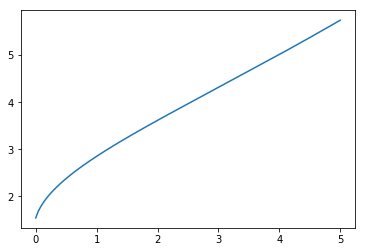

In [52]:
bif = list(bif_imm(0.0, 5, 1000))
plt.plot(*sep(bif))